In [3]:
# https://pysathq.github.io/installation/
#
# pip install python-sat[aiger,approxmc,cryptosat,pblib]

from pysat.card import *
from pysat.solvers import *
from pysat.formula import CNF, CNFPlus
from pysat.formula import IDPool

In [4]:
cnf = CNF()
vpool = IDPool()

In [5]:
m, n = 25, 30 
# row, col

In [6]:
for i in range(1, m+1):
    for j in range(1, n+1):
        vpool.id((i, j))

In [7]:
import numpy as np

cat_bitmap = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0],
    [0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0],
    [0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0],
    [1,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0],
    [0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
    [0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
    ])

In [8]:
def get_r_vector(bitmap):
    return np.sum(bitmap, axis=1)

def get_c_vector(bitmap):
    return np.sum(bitmap, axis=0)

def get_a_vector(bitmap):
    flipped = np.fliplr(bitmap)
    antidiag_sums = [int(np.sum(np.diag(flipped, k=k))) for k in range(-bitmap.shape[0] + 1, bitmap.shape[1])]
    return np.flip(np.array(antidiag_sums))

def get_b_vector(bitmap):
    diag_sums = [np.sum(np.diag(bitmap, k=k)) for k in range(-bitmap.shape[0]+1, bitmap.shape[1])]
    return np.flip(diag_sums)


In [9]:
#cols = [2,2,2,10,8,10,4,6,9,7,5,7,6,8,5,7,4,6,7,6,6,11,5,7,6,8,7,7,2,2]
cols = get_c_vector(cat_bitmap)
assert len(cols) == n, len(cols)

#rows = [1,5,5,12,10,6,6,3,3,3,2,8,6,12,12,5,10,11,4,12,7,14,11,4,10]
rows = get_r_vector(cat_bitmap)
assert len(rows) == m, len(rows)

#a = [0,0,0,0,0,1,3,2,2,3,3,3,1,4,3,3,4,5,3,5,5,6,3,8,5,3,2,4,5,7,7,7,7,7,4,4,4,4,4,4,6,5,6,4,5,5,4,1,1,0,0,0,0,0]
a = get_a_vector(cat_bitmap)
assert len(a) == 54, len(a)

#b = [0,0,0,0,0,0,1,2,3,1,2,3,4,3,5,5,3,3,2,4,5,4,4,6,9,8,3,4,2,4,7,7,6,7,11,6,6,4,5,7,6,4,6,4,5,1,0,0,0,0,0,0,0,0]
b = get_b_vector(cat_bitmap)
assert len(b) == 54, len(b)

assert sum(cols) == sum(rows) == sum(a) == sum(b), (sum(cols), sum(rows), sum(a), sum(b))

assert np.array_equal(b,get_b_vector(cat_bitmap))

In [10]:
enc = EncType.seqcounter
#enc = EncType.totalizer
#enc = EncType.cardnetw

In [11]:
def encode_rows(cnf, vpool, rows, encoding):
    for i, row_i in enumerate(rows, start=1):
        lits = [vpool.id((i, j)) for j in range(1, n+1)]
        cnf.extend(CardEnc.equals(lits=lits, bound=row_i, vpool=vpool, encoding=encoding))

In [12]:
def encode_cols(cnf, vpool, cols, encoding):
    for j, col_j in enumerate(cols, start=1):
        lits = [vpool.id((i, j)) for i in range(1, m+1)]
        cnf.extend(CardEnc.equals(lits=lits, bound=col_j, vpool=vpool, encoding=encoding))

In [13]:
def encode_a_diagonals(cnf, vpool, a, encoding):
    for k, a_k in enumerate(a, start=1):
        lits = []

        current_point = (k, 1) if k <= m else (m, k - m + 1)

        while current_point[0] >= 1 and current_point[1] <= n:
            lits.append(vpool.id(current_point))
            current_point = (current_point[0] - 1, current_point[1] + 1)

        #print([vpool.obj(l) for l in lits])
        
        cnf.extend(CardEnc.equals(lits=lits, bound=a_k, vpool=vpool, encoding=encoding))

In [14]:
def encode_b_diagonals(cnf, vpool, b, encoding):
    for l, b_k in enumerate(b, start=1):
        lits = []

        current_point = (l, n) if l <= m else (m, n - (l - m))

        while current_point[0] >= 1 and current_point[1] >= 1:
            lits.append(vpool.id(current_point))
            current_point = (current_point[0] - 1, current_point[1] - 1)

        #print([vpool.obj(l) for l in lits])

        cnf.extend(CardEnc.equals(lits=lits, bound=b_k, vpool=vpool, encoding=encoding))

In [15]:
def encode_a_slope_diagonals(cnf, vpool, a_slope, k, encoding):
    for p, a_p in enumerate(a_slope, start=1):
        lits = []

        current_point = (p,1) if p <= m else (m, (p-m)*k + 1)

        while current_point[0] >= 1 and current_point[1] <= n:
            lits.append(vpool.id(current_point))
            current_point = (current_point[0] - 1, current_point[1] + 1) if current_point[1] % k == 0 else (current_point[0], current_point[1] + 1)

        #print([vpool.obj(l) for l in lits])    
    
        cnf.extend(CardEnc.equals(lits=lits, bound=a_p, vpool=vpool, encoding=encoding))

In [16]:
def encode_b_slope_diagonals(cnf, vpool, b_slope, k, encoding):
    for l, b_p in enumerate(b_slope, start=1):
        lits = []

        current_point = (l,n) if l <= m else (m, n - (l-m)*k)

        while current_point[0] >= 1 and current_point[1] >= 1:
            lits.append(vpool.id(current_point))
            current_point = (current_point[0] - 1, current_point[1] - 1) if current_point[1] % k == 1 else (current_point[0], current_point[1] - 1)

        #print([vpool.obj(l) for l in lits])
        
        cnf.extend(CardEnc.equals(lits=lits, bound=b_p, vpool=vpool, encoding=encoding))

In [ ]:
def encode_frames(cnf, vpool, frames, encoding):
    for k, f_k in enumerate(frames, start=1):
        lits = []

        top = k
        bottom = m - k - 1
        left = k
        right = n - k - 1

        # top edge
        for j in range(left, right + 1):
            lits.append(vpool.id((top + 1, j + 1)))  # +1 if vpool uses 1-based indexing

        # bottom edge
        for j in range(left, right + 1):
            lits.append(vpool.id((bottom + 1, j + 1)))

        # left edge
        for i in range(top, bottom + 1):
            lits.append(vpool.id((i + 1, left + 1)))

        # right edge
        for i in range(top, bottom + 1):
            lits.append(vpool.id((i + 1, right + 1)))

        # remove duplicates
        lits = list(dict.fromkeys(lits))

        #print([vpool.obj(l) for l in lits])
        
        cnf.extend(CardEnc.equals(lits=lits, bound=f_k, vpool=vpool, encoding=encoding))

In [ ]:
# encode_rows(cnf, vpool, rows, enc)
# encode_cols(cnf, vpool, cols, enc)
# encode_a_diagonals(cnf, vpool, a, enc)
# encode_b_diagonals(cnf, vpool, b, enc)

In [18]:
from pysat.solvers import Cadical195

In [18]:
with Cadical195(bootstrap_with=cnf) as solver:
    print(solver.solve())
    model = solver.get_model()

True


In [ ]:
#print(model)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
def show_model(model, position=None):
    # Matrix of nans
    matrix = np.empty((m, n), dtype=int)
    matrix[:] = -1

    for var in model:
        if var > 0:
            name = vpool.obj(var)
            if isinstance(name, tuple) and len(name) == 2:
                matrix[name[0] - 1, name[1] - 1] = 0
        else:
            assert var < 0
            name = vpool.obj(-var)
            if isinstance(name, tuple) and len(name) == 2:
                matrix[name[0] - 1, name[1] - 1] = 1

    assert np.max(matrix) == 1 and np.min(matrix) == 0

    matrix = matrix.astype(bool)

    plt.clf()  # Clear the current figure
    plt.imshow(matrix, cmap='gray', interpolation='nearest')

    if position is not None:
        i, j = position
        plt.scatter(j - 1, i - 1, color='red')  # Highlight the current position

    plt.xticks(ticks=np.arange(n), labels=np.arange(1, n + 1))
    plt.yticks(ticks=np.arange(m), labels=np.arange(1, m + 1))
    plt.grid(False)
    #plt.grid(True)
    plt.show()

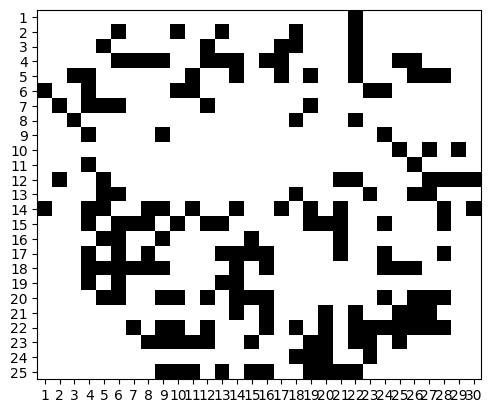

In [21]:
show_model(model)

In [20]:
def model_to_bitmap(model,vpool):
    positive_cells = [vpool.obj(l) for l in model if l > 0 and vpool.obj(abs(l)) is not None]

    if not positive_cells:
        return np.zeros((0, 0))

    max_row = max(r for r, c in positive_cells)
    max_col = max(c for r, c in positive_cells)

    bitmap = np.zeros((max_row, max_col), dtype=int)
    for row, col in positive_cells:
        bitmap[row - 1, col - 1] = 1

    return bitmap

In [22]:
def show_bitmap(bitmap, position=None):
    matrix = bitmap.astype(bool)

    h, w = matrix.shape

    plt.clf()
    plt.imshow(~matrix, cmap='gray', interpolation='nearest')

    if position is not None:
        i, j = position
        plt.scatter(j - 1, i - 1, color='red')

    plt.xticks(ticks=np.arange(w), labels=np.arange(1, w + 1))
    plt.yticks(ticks=np.arange(h), labels=np.arange(1, h + 1))
    plt.grid(False)
    plt.show()

In [ ]:
# my_bitmap = model_to_bitmap(model, vpool)
# show_bitmap(my_bitmap)
# show_bitmap(cat_bitmap)

In [21]:
def bitmap_to_model(bitmap, vpool):
    height, width = bitmap.shape
    model = []

    for i in range(height):
        for j in range(width):
            var = vpool.id((i + 1, j + 1))
            if bitmap[i, j] == 1:
                model.append(var)
            else:
                model.append(-var)

    return model

In [19]:
# slope diagonals image encodings

"""
Diagonals with slope 1/k
. . . . x x
. . x x . .
x x . . . . (when k = 2)
"""

def get_a_with_slope_vector(bitmap, k):
    m, n = bitmap.shape
    a_with_slope_vector = []
    total_groups = m + int(np.ceil(n / k)) - 1
    
    for i in range(total_groups):
        diag_sum = 0
        for j in range(max(0, i - m + 1), min(i + 1, int(np.ceil(n / k)))):
            for l in range(k):
                col = j * k + l
                row = i - j
                if col < n and row < m:
                    diag_sum += bitmap[row, col]
        a_with_slope_vector.append(diag_sum)
    
    return np.array(a_with_slope_vector)

def get_b_with_slope_vector(bitmap, k):
    m, n = bitmap.shape
    b_with_slope_vector = []
    total_groups = m + int(np.ceil(n / k)) - 1

    for i in range(total_groups):
        diag_sum = 0
        for j in range(max(0, i - m + 1), min(i + 1, int(np.ceil(n / k)))):
            for l in range(k):
                col = n - 1 - (j * k + l)
                row = i - j
                if 0 <= col < n and 0 <= row < m:
                    diag_sum += bitmap[row, col]
        b_with_slope_vector.append(diag_sum)

    return np.array(b_with_slope_vector)

In [25]:
# frames image encoding

"""
xxxxxxxxxx
x********x
x*@@@@@@*x
x*@....@*x
x*@.$$.@*x
x*@....@*x
x*@@@@@@*x
x********x
xxxxxxxxxx
"""


def get_frames_vector(bitmap):
    m, n = bitmap.shape
    frames_num = min(1 + m//2, 1 + n//2)
    frames_vector = []
    
    for i in range(frames_num):
        frame_sum = 0
        if (i == frames_num - 1) and min(m,n) % 2 == 1:
            # special cases
            if m>n:
                frame_sum += np.sum(bitmap[i:m-i, i])
            elif n>m:
                frame_sum += np.sum(bitmap[i, i:n-i])
            else:
                frame_sum += bitmap[i,i]
        else:
            frame_sum += np.sum(bitmap[i,i:n-i])            # top row
            frame_sum += np.sum(bitmap[m-i-1,i:n-i])        # bottom row
            frame_sum += np.sum(bitmap[i+1:m-i-1, i])       # left edge without corner
            frame_sum += np.sum(bitmap[i+1:m-i-1, n-i-1])   # right edge without corner

        frames_vector.append(frame_sum)
    
    return np.array(frames_vector)

In [ ]:
import time

# bool rowcol, bool diags, int k_slope (if 0 then it is turned off), frame
def encode_tomography(encoding, rowcol=True, diags=True, k_slope=0, frames=False):
    vpool = IDPool()
    cnf = CNF()

    if rowcol:
        encode_rows(cnf, vpool, rows, encoding)
        encode_cols(cnf, vpool, cols, encoding)

    if diags:
        encode_a_diagonals(cnf, vpool, a, encoding)
        encode_b_diagonals(cnf, vpool, b, encoding)

    if k_slope > 0:
        a_slope = get_a_with_slope_vector(cat_bitmap, k_slope)
        b_slope = get_b_with_slope_vector(cat_bitmap, k_slope)
        encode_a_slope_diagonals(cnf, vpool, a_slope, k_slope, encoding)
        encode_b_slope_diagonals(cnf, vpool, b_slope, k_slope, encoding)
    
    if frames:
        frames_vec = get_frames_vector(cat_bitmap)
        encode_frames(cnf, vpool, frames_vec, encoding)
    
    return cnf, vpool

def measure_encoding_performance(encoding, rowcol=True, diags=True, k_slope=0, frames=False):
    """Build and solve the CNF, measuring size and time."""

    t0 = time.time()
    cnf, vpool = encode_tomography(encoding, rowcol, diags, k_slope, frames)
    build_time = time.time() - t0

    t1 = time.time()
    solver = Cadical195(bootstrap_with=cnf)
    #solver = Glucose3(bootstrap_with=cnf)
    sat = solver.solve()
    solve_time = time.time() - t1

    n_vars = max(abs(lit) for clause in cnf.clauses for lit in clause)
    n_clauses = len(cnf.clauses)

    return {
        "encoding": encoding,
        "vars": n_vars,
        "clauses": n_clauses,
        "build_time": build_time,
        "solve_time": solve_time,
        "satisfiable": sat
    }

# def compare_encodings():
#     encodings = [1,2,3] # 1=seqcounter, 2=totalizer, 3=cardnetw
#     results = [measure_encoding_performance(enc) for enc in encodings]

#     print(f"{'Encoding':<12} {'Vars':<8} {'Clauses':<10} {'Build(s)':<10} {'Solve(s)':<10} {'SAT?'}")
#     for r in results:
#         print(f"{r['encoding']:<12} {r['vars']:<8} {r['clauses']:<10} "
#               f"{r['build_time']:<10.4f} {r['solve_time']:<10.4f} {r['satisfiable']}")
        
# compare_encodings()

In [ ]:
import statistics

# script for RCI cluster which runs each scenario multiple times and computes the average
def run_experiment(reps_num=5):
    scenarios = [
        {"name": "rowcol only", "rowcol": True, "diags": False, "k_slope": 0, "frames": False},
        {"name": "diags only", "rowcol": False, "diags": True, "k_slope": 0, "frames": False},
        {"name": "rowcol + diag", "rowcol": True, "diags": True, "k_slope": 0, "frames": False},
        {"name": "rowcol + slope2", "rowcol": True, "diags": False, "k_slope": 2, "frames": False},
        {"name": "rowcol + slope3", "rowcol": True, "diags": False, "k_slope": 3, "frames": False},
        # add some more
    ]

    encodings = [1, 2, 3]  # 1=seqcounter, 2=totalizer, 3=cardnetw

    print(f"{'Scenario':<20} {'Encoding':<10} {'Vars':<8} {'Clauses':<10} "
          f"{'BuildAvg':<10} {'SolveAvg':<10} {'SAT?'}")

    for scenario in scenarios:
        for enc in encodings:
            build_times, solve_times = [], []
            satisfiable = None

            for _ in range(reps_num):
                result = measure_encoding_performance(
                    enc,
                    rowcol=scenario["rowcol"],
                    diags=scenario["diags"],
                    k_slope=scenario["k_slope"],
                    frames=scenario["frames"]
                )
                build_times.append(result["build_time"])
                solve_times.append(result["solve_time"])
                satisfiable = result["satisfiable"]

            print(f"{scenario['name']:<20} {enc:<10} "
                  f"{result['vars']:<8} {result['clauses']:<10} "
                  f"{statistics.mean(build_times):<10.4f} "
                  f"{statistics.mean(solve_times):<10.4f} {satisfiable}")


In [22]:
run_experiment()

Scenario             Encoding   Vars     Clauses    BuildAvg   SolveAvg   SAT?
rowcol only          1          24208    47083      0.1866     8.7208     True
rowcol only          2          84402    125715     0.4596     61.1887    True


error: Caught keyboard interrupt

In [27]:
from itertools import product

In [28]:
# Lexicographically first model
def lexicographically_first_model(cnf, vpool):
    assumptions = []

    with Cadical195(bootstrap_with=cnf) as solver:
        while True:
            print('Tail of assumptions:', assumptions[-5:], flush=True)

            if solver.solve(assumptions=assumptions):
                model = solver.get_model()

                model_set = set(model)

                for i, j in product(range(1, m + 1), range(1, n + 1)):
                    var = vpool.id((i, j))

                    if var in set(assumptions):
                        assert var in model_set
                        if i == m and j == n:
                            return model

                    elif -var in set(assumptions):
                        assert -var in model_set
                        if i == m and j == n:
                            return model
                    else:
                        if -var in model_set:
                            assumptions.append(-var)
                        elif var in model_set:
                            assumptions.append(-var)
                            show_model(model, position=(i, j))
                            break
                        else:
                            raise
            else:
                var = assumptions.pop()
                assert var < 0, var
                print(vpool.obj(-var))
                assumptions.append(-var)

In [ ]:
model2 = lexicographically_first_model(cnf, vpool)

In [ ]:
show_model(model2)

In [ ]:
#from pysat.allies.approxmc import Counter
#with Counter(formula=cnf, epsilon=0.1, delta=0.9, verbose=1000) as counter:
#    num = counter.count(projection=range(1, m*n + 1))
#    print(num)

In [ ]:
cnf.to_file('dt.cnf')

In [ ]:
with open('dt.cnf_ganak', 'w') as fwrite:
    with open('dt.cnf', 'r') as fread:
        for line in fread:
            if line.startswith('p cnf'):
                fwrite.write(line)
                fwrite.write('c t pmc\n')
                fwrite.write(f"c p show {' '.join([str(i) for i in range(1, m*n + 1)])} 0\n")                
            else:
                fwrite.write(line)

        

In [ ]:
# https://github.com/meelgroup/ganak
#
# karel@dai-06:~/tmp/dt$ ./ganak dt.cnf_ganak 


In [ ]:
# show approxmc only for vars 300-303
#
#(pysat) karel@dai-06:~/tmp/dt$ approxmc.py -v 0 -p 300-303 dt.cnf
#s mc 14
